#### Load tensorflow

In [2]:
import tensorflow as tf

#### Collect Data

We will use MNIST dataset for this exercise. This dataset contains images of hand written numbers with each image being a black & white picture of size 28x28. We will download the data using tensorflow API. The dataset has 60,000 training examples and 10,000 test examples. Please note that images have already been converted to numpy arrays.

In [3]:
#Download dataset
(trainX, trainY),(testX, testY) = tf.keras.datasets.mnist.load_data()

In [4]:
#Check number of training examples and size of each example
trainX.shape

(60000, 28, 28)

In [5]:
trainX[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
#Check number of test examples and size of each example
testX.shape

(10000, 28, 28)

Visualize data

In [7]:
import matplotlib.pyplot as plt
import numpy as np

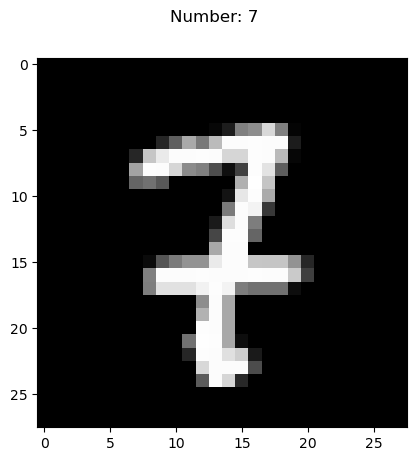

In [8]:
img_num = np.random.randint(0, testX.shape[0]) #Get a random integer between 0 and number of examples in test dataset
plt.imshow(testX[img_num],cmap='gray') #Show the image from test dataset
plt.suptitle('Number: ' + str(testY[img_num]))
plt.show()

#### Prepare Labels
Convert Output label to multiple values

In [9]:
#Label for an example
testY[0]

7

In [10]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [11]:
#Label for same example after one hot encoding
testY[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

#### Build the Model V1
Activation function 'tanh' --> Hyperbolic tangent

In [12]:
#Initialize Sequential model
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

In [13]:
model.output

<KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'batch_normalization')>

Add Hidden Layers

In [14]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(200, activation='tanh'))

In [15]:
model.output

<KerasTensor: shape=(None, 200) dtype=float32 (created by layer 'dense')>

In [16]:
#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='tanh'))

In [17]:
model.output

<KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'dense_1')>

In [18]:
#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(60, activation='tanh'))

In [19]:
#Add 4th hidden layer
model.add(tf.keras.layers.Dense(30, activation='tanh'))

In [20]:
model.output

<KerasTensor: shape=(None, 30) dtype=float32 (created by layer 'dense_3')>

**Add Output Layer**
Please note that activation function for the output layer is independent of what we used in hidden layer. Here we need to get 10 probabilities  (10 classes in MNIST with one right answer) and hence using softmax.

In [21]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

Compile the Model

In [22]:
#Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])

Review model

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 784)               0         
                                                                 
 batch_normalization (Batch  (None, 784)               3136      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 60)                6060      
                                                                 
 dense_3 (Dense)             (None, 30)                1830      
                                                        

#### Build the Model V2
With Activation function Relu

In [24]:
#Initialize Sequential model
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

In the code from previous model, replace 'tanh' with 'relu'

In [25]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(200, activation='relu'))

#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='relu'))

#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(60, activation='relu'))

#Add 4th hidden layer
model.add(tf.keras.layers.Dense(30, activation='relu'))

Output layer activation functio **will not change**.

In [26]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [27]:
#Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])

#### Build the model V3
With LeakyRelu activation function

In [28]:
#Initialize Sequential model
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

LeakyRelu is available as a layer in Keras

In [29]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(200))
model.add(tf.keras.layers.LeakyReLU())

#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.LeakyReLU())

#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(60))
model.add(tf.keras.layers.LeakyReLU())

#Add 4th hidden layer
model.add(tf.keras.layers.Dense(30))
model.add(tf.keras.layers.LeakyReLU())

Output layer will remain same.

In [30]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])

#### Build the Model V4
Applying Dropout

In [31]:
#Initialize Sequential model
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

**Dropout** can be applied after any trainable layer (e.g Dense). Dropuout rate is a hyper-parameter and usually between 0.1 (10%) to 0.5 (50%). In Keras, Dropout is a layer and we can specify the dropout rate when adding the layer.

In [32]:
#Add 1st hidden layer 
model.add(tf.keras.layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4)) #40% dropout rate

#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3)) #30% dropout rate

#Add 3rd hidden layer, we may or may not use dropout after every layer
model.add(tf.keras.layers.Dense(60, activation='relu'))

#Add 4th hidden layer
model.add(tf.keras.layers.Dense(30, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25)) #25% dropout rate

Never use dropout **after** the output layer

In [33]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [34]:
#Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])

#### Build the Model V5
Applying BatchNormalization

In [35]:
#Initialize Sequential model
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

**BatchNormalization** can be applied **before** any trainable layer (e.g Dense). We can use a combination of BatchNorm and Dropout layer. Both layers are used to reduce overfitting.

In [36]:
#Add 1st hidden layer 
model.add(tf.keras.layers.Dense(200, activation='relu'))

#Add 2nd hidden layer
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(100, activation='relu'))

#Add 3rd hidden layer, we may or may not use dropout after every layer
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(60, activation='relu'))

#Add 4th hidden layer
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(30, activation='relu'))

We can use BatchNorm layer **before** the output layer

In [37]:
#Add OUTPUT layer
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [38]:
#Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])

#### Changing default learning rate

Learning rate can be changed in the optimizer. So when we do model.compile, we can use a customized optimizer object. Try different learning rates to see which helps to get better test accuracy (or lower test loss).

In [39]:
#Create a SGD Optimizer object and set the learning ('lr' parameter)
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

#Use the above object while compiling th model
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

#### Learning rate decay

Learning rate decay is an approach to reduce learning rate over a period. We can set decay rate in the optimizer object using 'decay' parameter.

In [40]:
#Create a SGD Optimizer object and set the learning ('lr' parameter)
sgd_optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=0.1, decay=0.001)

#Use the above object while compiling the model
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

#### Using different Optimizers

Applying Momentum

In [41]:
#Create a SGD Optimizer object and set the momentum parameter
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)

#Use the above object while compiling the model
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

Applying Nesterov Momemtum

In [42]:
#Create a SGD Optimizer object and set the momentum parameter and nesetrov=True
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9, nesterov=True)

#Use the above object while compiling th model
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

Adagrad

In [43]:
#Using adagrad
model.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])

Adadelta

In [44]:
#Using adadelta
model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])

RMSProp

In [45]:
#Using RMSProp
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

RMSProp with a different learning rate

In [46]:
#Create a RMSProp Optimizer object and set the learning rate
rmsprop_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.1)

#Use the above object while compiling the model
model.compile(optimizer=rmsprop_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

Using Adam

In [47]:
#Using Adam
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#### Train the model

In [48]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('mnist_v1.h5', save_best_only=True, 
                                                      monitor='val_accuracy', 
                                                      mode='max', verbose=1)

In [49]:
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=10,
          batch_size=32, 
          callbacks=[model_checkpoint])

Epoch 1/10
1875/1875 [==============================] - ETA: 0s - loss: 0.3109 - accuracy: 0.9087
Epoch 1: val_accuracy improved from -inf to 0.95630, saving model to mnist_v1.h5


C:\Users\dibya_xo5nlek\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1875/1875 [==============================] - 86s 36ms/step - loss: 0.3109 - accuracy: 0.9087 - val_loss: 0.2559 - val_accuracy: 0.9563
Epoch 2/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.1517 - accuracy: 0.9544
Epoch 2: val_accuracy improved from 0.95630 to 0.96750, saving model to mnist_v1.h5
1875/1875 [==============================] - 65s 35ms/step - loss: 0.1517 - accuracy: 0.9544 - val_loss: 0.2875 - val_accuracy: 0.9675
Epoch 3/10
1875/1875 [==============================] - ETA: 0s - loss: 0.1161 - accuracy: 0.9632
Epoch 3: val_accuracy improved from 0.96750 to 0.96780, saving model to mnist_v1.h5
1875/1875 [==============================] - 63s 34ms/step - loss: 0.1161 - accuracy: 0.9632 - val_loss: 0.2951 - val_accuracy: 0.9678
Epoch 4/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0926 - accuracy: 0.9711
Epoch 4: val_accuracy improved from 0.96780 to 0.97120, saving model to mnist_v1.h5
1875/1875 [==============================] - 63s 

In [77]:
model.save('mnist_sigmoid_v1.h5')

In [78]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is C6CE-F4F0

 Directory of C:\Users\dibya_xo5nlek\Documents\Documents\DL

08/05/2023  04:18 PM    <DIR>          .
08/05/2023  04:18 PM    <DIR>          ..
08/04/2023  10:40 PM    <DIR>          .ipynb_checkpoints
08/05/2023  03:43 PM            50,621 1. Classification_MNIST_DNN_Keras.ipynb
08/05/2023  03:53 PM            12,126 1a. MNIST_DNN_Keras_ADAM_RELU.ipynb
08/05/2023  03:53 PM             9,618 1b. Classification_MNIST_DNN_Keras_decay.ipynb
08/05/2023  03:53 PM            17,971 1c. Classification_MNIST_DNN_Keras - NN1.ipynb
08/05/2023  04:18 PM            52,208 Improving the ML Model - Different techniques.ipynb
08/04/2023  08:17 PM           555,008 Iris.ipynb
08/05/2023  03:41 PM           809,600 mnist_dnn_v1.h5
08/05/2023  12:55 PM            14,185 MNIST_FASHION_Exercise.ipynb
08/05/2023  03:39 PM           809,600 mnist_sgd.h5
08/05/2023  03:37 PM         1,579,480 mnist_sgd_mom.h5
08/05/2023  04:20 PM         2,348

Load a saved model

In [79]:
model = tf.keras.models.load_model('mnist_sigmoid_v1.h5')

In [80]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 784)               0         
                                                                 
 batch_normalization (Batch  (None, 784)               3136      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 batch_normalization_1 (Bat  (None, 200)               800       
 chNormalization)                                                
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 batch_normalization_2 (Bat  (None, 100)               4

### Model Prediction

In [81]:
import numpy as np

What input shape model is expecting?

In [82]:
model.input

<KerasTensor: shape=(None, 28, 28) dtype=float32 (created by layer 'reshape_input')>

Predicting on first example

In [83]:
testX[0].shape

(28, 28)

In [84]:
model.predict(testX[0])

ValueError: in user code:

    File "C:\Users\dibya_xo5nlek\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 2341, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\dibya_xo5nlek\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 2327, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\dibya_xo5nlek\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 2315, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\dibya_xo5nlek\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 2283, in predict_step
        return self(x, training=False)
    File "C:\Users\dibya_xo5nlek\AppData\Roaming\Python\Python311\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\dibya_xo5nlek\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\reshape.py", line 118, in _fix_unknown_dimension
        raise ValueError(msg)

    ValueError: Exception encountered when calling layer 'reshape' (type Reshape).
    
    total size of new array must be unchanged, input_shape = [28], output_shape = [784]
    
    Call arguments received by layer 'reshape' (type Reshape):
      • inputs=tf.Tensor(shape=(None, 28), dtype=float32)


Why are we getting the error?

In [75]:
testX[0].shape

(28, 28)

Building a Batch

In [74]:
input_data = np.expand_dims(testX[0], axis=0)
input_data.shape

(1, 28, 28)

Model Prediction

In [73]:
pred = model.predict(input_data)
pred

1/1 [==============================] - 0s 173ms/step


array([[2.9856068e-07, 2.6391195e-05, 2.5130377e-05, 5.1591142e-05,
        1.7688377e-05, 9.4957971e-07, 5.0015819e-07, 9.9962747e-01,
        3.2705607e-06, 2.4677624e-04]], dtype=float32)

In [72]:
pred.shape

(1, 10)

In [71]:
pred[0]

array([2.9856068e-07, 2.6391195e-05, 2.5130377e-05, 5.1591142e-05,
       1.7688377e-05, 9.4957971e-07, 5.0015819e-07, 9.9962747e-01,
       3.2705607e-06, 2.4677624e-04], dtype=float32)

Predicted Class

In [70]:
np.argmax(pred[0])

7

In [69]:
np.max(pred[0])

0.9996275

Actual Class

In [68]:
np.argmax(testY[0])

7

Visual confirmation

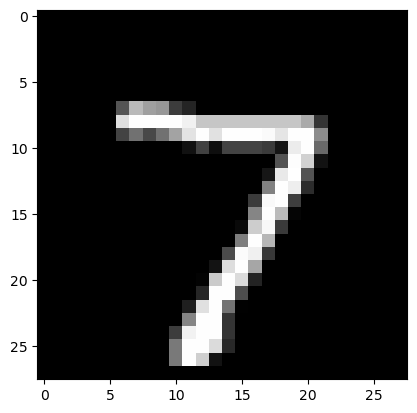

In [67]:
#Lets print the image as well
import matplotlib.pyplot as plt
plt.imshow(testX[0],cmap='gray')
plt.show()